### Step 0: Load the Dataset  
If you already have the dataset created in memory, you can copy it.  
Otherwise, load it from a CSV file and preview the first few rows to understand the structure and issues.


In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv("Large_Dirty_Sales_Dataset.csv")

# Show the first few rows
df.head()


,Store_ID,Product,Category,Date,Units_Sold,Revenue,Discount(%)
0,store_02,Thingamajig,home,2023/01/21,1,500,5
1,store_02,Gadget,electronics,2023/01/25,NaN,100,NaN
2,Store_04,Thingamajig,Home,2023/03/31,20,Three Hundred,NaN
3,store_02,Thingamajig,Gadgets,2023/01/10,100,NaN,15
4,store_05,Doodad,Home,2023/02/17,NaN,400,NaN


### Step 1: Standardize `Store_ID` and `Category` Columns  
We'll remove extra spaces and fix inconsistent casing in the `Store_ID` and `Category` columns to ensure grouping and filtering work properly later.


In [3]:
# Strip leading/trailing whitespace and fix case inconsistencies
df['Store_ID'] = df['Store_ID'].str.strip().str.title()
df['Category'] = df['Category'].str.strip().str.title()

# Preview the changes
df[['Store_ID', 'Category']].head()


,Store_ID,Category
0,Store_02,Home
1,Store_02,Electronics
2,Store_04,Home
3,Store_02,Gadgets
4,Store_05,Home


### Step 2: Convert `Date` Column to Datetime Format  
We'll convert the `Date` column from string format to proper datetime objects. This will allow us to perform time-based operations like filtering by month or plotting trends over time.


In [5]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d', errors='coerce')

# Display the updated column
df['Date'].head()


0   2023-01-21
1   2023-01-25
2   2023-03-31
3   2023-01-10
4   2023-02-17
Name: Date, dtype: datetime64[ns]

### Step 3: Clean `Units_Sold` Column  
The `Units_Sold` column contains numeric values, missing values, and some invalid strings like `"twenty"`.  
We'll convert this column to numeric and handle invalid entries by coercing them into NaN.


In [7]:
# Convert Units_Sold to numeric, coercing invalid entries to NaN
df['Units_Sold'] = pd.to_numeric(df['Units_Sold'], errors='coerce')

# Preview the cleaned column
df['Units_Sold'].head()


0      1.0
1      NaN
2     20.0
3    100.0
4      NaN
Name: Units_Sold, dtype: float64

### Step 4: Clean `Revenue` Column  
The `Revenue` column includes numeric values, missing entries, and text strings like `"Three Hundred"`.  
We'll first replace known text values with their numeric equivalents, then convert the column to numeric and coerce anything invalid to NaN.


In [9]:
# Replace known string values with numbers
df['Revenue'] = df['Revenue'].replace({'Three Hundred': 300})

# Convert to numeric, coercing anything else problematic
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

# Preview the cleaned column
df['Revenue'].head()


0    500.0
1    100.0
2    300.0
3      NaN
4    400.0
Name: Revenue, dtype: float64

### Step 5: Clean `Discount(%)` Column  
The `Discount(%)` column contains numeric values, missing values, and strings like `"ten"`.  
We'll replace known string equivalents with numbers and convert the entire column to numeric.


In [11]:
# Replace known text values with numeric equivalents
df['Discount(%)'] = df['Discount(%)'].replace({'ten': 10})

# Convert to numeric, coercing errors to NaN
df['Discount(%)'] = pd.to_numeric(df['Discount(%)'], errors='coerce')

# Preview the cleaned column
df['Discount(%)'].head()


0     5.0
1     NaN
2     NaN
3    15.0
4     NaN
Name: Discount(%), dtype: float64

### Step 6: Check for Missing Values  
Now that we've cleaned each column, we’ll inspect the dataset for any remaining missing values.  
Depending on the context, we can choose to drop, fill, or flag these entries.


In [13]:
# Summarize missing values in each column
missing_summary = df.isnull().sum()
print("Missing values per column:")
print(missing_summary)


Missing values per column:
Store_ID         0
Product          0
Category         0
Date             0
Units_Sold     406
Revenue        281
Discount(%)    315
dtype: int64


### Step 7: Fill Missing Values  
Since the dataset is relatively small (2000 rows), we’ll fill in missing values to retain as much data as possible.  
We'll use median values for numerical columns and a placeholder like `"Unknown"` for categorical values if needed.


In [15]:
# Fill numerical columns with median
df['Units_Sold'] = df['Units_Sold'].fillna(df['Units_Sold'].median())
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].median())
df['Discount(%)'] = df['Discount(%)'].fillna(df['Discount(%)'].median())

# Optional: If any categorical columns were missing, you could fill with a placeholder
# df['Category'] = df['Category'].fillna('Unknown')

# Check to confirm all missing values are handled
print("Any missing values left?", df.isnull().any().any())


Any missing values left? False


### Step 8: Preview the Cleaned Dataset  
Now that we’ve finished cleaning, we’ll take a quick look at the structure of the dataset.  
This helps verify that data types are correct and that our cleaning steps didn’t introduce unexpected issues.


In [17]:
# Show data types to confirm conversions
print("Column data types:\n", df.dtypes)

# Show basic statistics
print("\nSummary statistics:")
print(df.describe(include='all'))

# Display first 5 rows of the cleaned dataset
df.head()


Column data types:
 Store_ID               object
Product                object
Category               object
Date           datetime64[ns]
Units_Sold            float64
Revenue               float64
Discount(%)           float64
dtype: object

Summary statistics:
        Store_ID Product Category                        Date   Units_Sold  \
count       2000    2000     2000                        2000  2000.000000   
unique         5       4        3                         NaN          NaN   
top     Store_02  Doodad     Home                         NaN          NaN   
freq         425     532      809                         NaN          NaN   
mean         NaN     NaN      NaN  2023-02-14 13:55:55.200000    41.256500   
min          NaN     NaN      NaN         2023-01-01 00:00:00     1.000000   
25%          NaN     NaN      NaN         2023-01-24 00:00:00     3.000000   
50%          NaN     NaN      NaN         2023-02-15 00:00:00    20.000000   
75%          NaN     NaN      NaN

,Store_ID,Product,Category,Date,Units_Sold,Revenue,Discount(%)
0,Store_02,Thingamajig,Home,2023-01-21,1.0,500.0,5.0
1,Store_02,Gadget,Electronics,2023-01-25,20.0,100.0,10.0
2,Store_04,Thingamajig,Home,2023-03-31,20.0,300.0,10.0
3,Store_02,Thingamajig,Gadgets,2023-01-10,100.0,300.0,15.0
4,Store_05,Doodad,Home,2023-02-17,20.0,400.0,10.0


### Step 9: Univariate Analysis – Value Counts and Distributions  
We’ll begin EDA by looking at single-column distributions.  
This includes frequency counts for categorical variables and distribution plots for numerical ones.


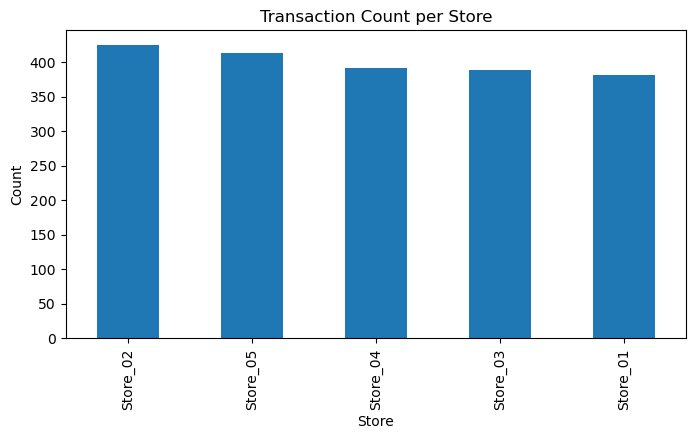

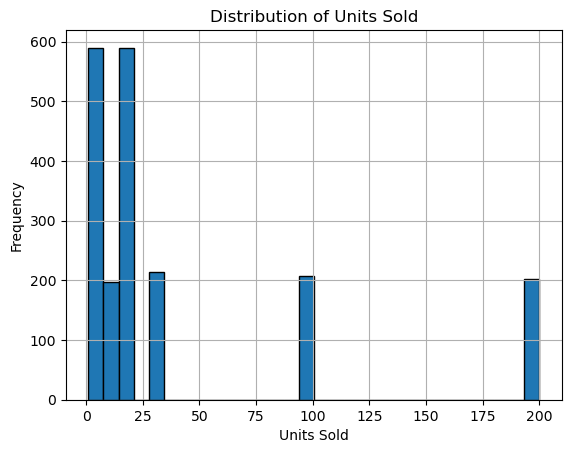

In [19]:
import matplotlib.pyplot as plt

# Plot value counts for Store_ID
df['Store_ID'].value_counts().plot(kind='bar', title='Transaction Count per Store', figsize=(8, 4))
plt.xlabel('Store')
plt.ylabel('Count')
plt.show()

# Histogram for Units_Sold
df['Units_Sold'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()


### Step 10: Bivariate Analysis – Revenue by Store and Category  
Now let’s analyze how revenue varies by `Store_ID` and `Category`.  
We'll use groupby-aggregation and visualize the results using bar charts.


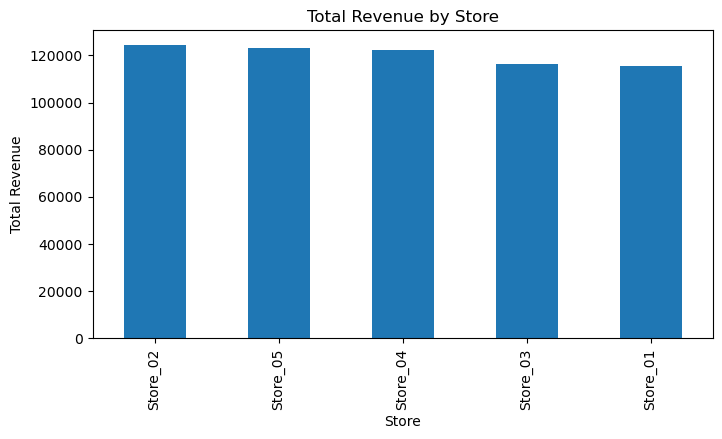

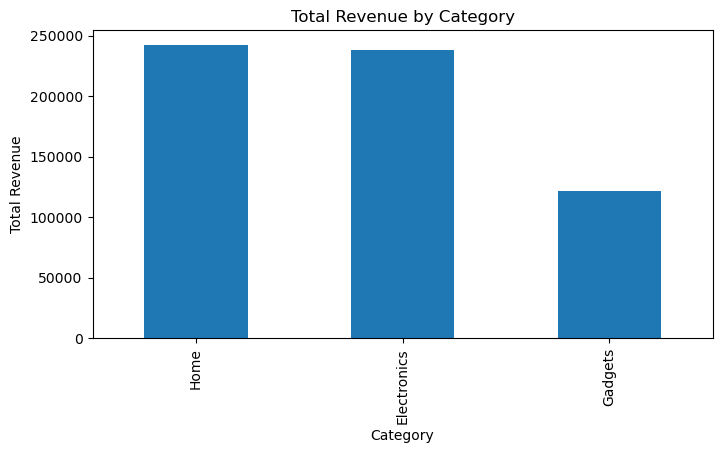

In [21]:
# Revenue by Store
store_revenue = df.groupby('Store_ID')['Revenue'].sum().sort_values(ascending=False)
store_revenue.plot(kind='bar', title='Total Revenue by Store', figsize=(8, 4))
plt.ylabel('Total Revenue')
plt.xlabel('Store')
plt.show()

# Revenue by Category
category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', title='Total Revenue by Category', figsize=(8, 4))
plt.ylabel('Total Revenue')
plt.xlabel('Category')
plt.show()


### Step 11: Time Series Analysis – Revenue Over Time  
To identify sales trends, we’ll look at total revenue aggregated by date.  
This helps us spot patterns like spikes, drops, or seasonality.


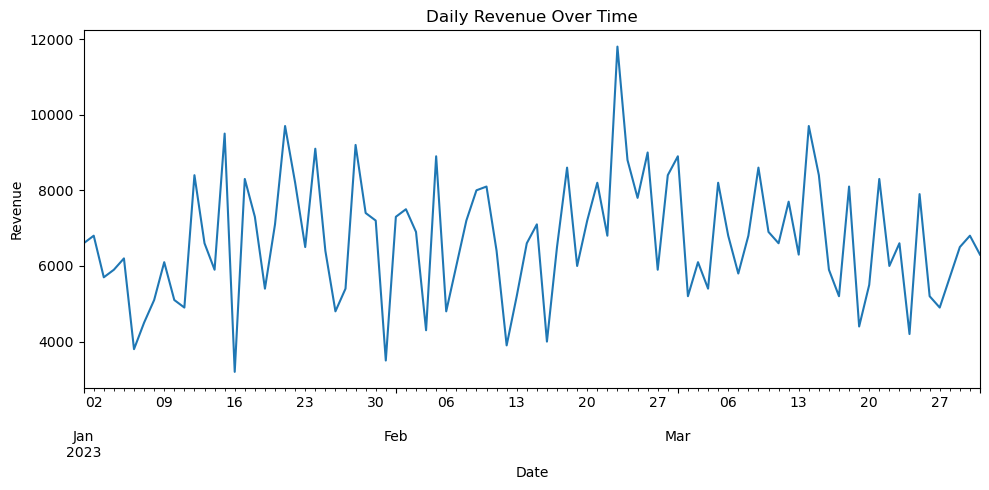

In [23]:
# Aggregate revenue by date
daily_revenue = df.groupby('Date')['Revenue'].sum()

# Plot the trend
daily_revenue.plot(figsize=(10, 5), title='Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


### Step 12: Visual EDA Summary

- **Store-Level Revenue & Activity:**
  - All stores have similar revenue, with Store_02 slightly ahead.
  - Transaction counts per store are evenly distributed — no store dominates in volume.

- **Category-Level Revenue:**
  - `Home` and `Electronics` categories drive nearly all revenue.
  - `Gadgets` significantly underperform compared to others.

- **Units Sold:**
  - Most transactions are for low-to-mid quantity items (1–30 units).
  - Some spikes at high-volume sales (100, 200) suggest occasional bulk orders.

- **Time Series Trend:**
  - Daily revenue is highly volatile with no clear seasonality.
  - A large spike is visible in late February, worth investigating further.



In [27]:
# Export the cleaned DataFrame to a CSV file
df.to_csv("cleaned_sales_data.csv", index=False)

print("Cleaned dataset exported successfully.")


Cleaned dataset exported successfully.


# Handling Dirty Datasets: Recommended Practices

## 1. Perform Initial Assessment
- Do not assume the dataset is clean or reliable upon loading.
- Use basic inspection methods such as `.head()`, `.info()`, and `.sample()` to examine structure and potential issues.
- Assess for anomalies in format, casing, spelling, and consistency.

---

## 2. Standardize Categorical Data
- Remove leading/trailing whitespace and normalize casing (e.g., title case or lowercase).
- Ensure consistency in category naming to avoid erroneous groupings and aggregations.
- Example: `"Store_01"` and `" store_01 "` should be treated as identical values.

---

## 3. Enforce Appropriate Data Types
- Convert columns to appropriate types (e.g., numeric, datetime).
- Use `errors='coerce'` during conversion to handle invalid values gracefully.
- Accurate data types are essential for valid calculations, filtering, and visualizations.

---

## 4. Address Missing and Invalid Values
- Identify missing data using methods such as `.isnull().sum()`.
- Choose a strategy based on context:
  - **Drop** rows with missing values if they are not critical and occur infrequently.
  - **Impute** using statistical methods such as median, mean, or mode.
  - **Flag** missing entries where the fact of absence may carry analytical significance.

---

## 5. Replace Known Invalid Inputs
- Replace problematic text-based entries (e.g., `"Three Hundred"`, `"ten"`) with valid numeric representations.
- Ensures data integrity and compatibility with numerical analysis.

---

## 6. Validate Data Post-Cleaning
- Confirm data types using `.dtypes`.
- Use `.describe()` to review summary statistics and detect outliers or inconsistencies.
- Examine categorical distributions with `.value_counts()` to ensure standardization was successful.

---

## 7. Document Cleaning Decisions
- Keep a clear record of modifications made:
  - Values replaced
  - Columns transformed
  - Imputation or deletion strategies
- Documentation is essential for transparency, reproducibility, and auditability.

---

## Summary
A structured, methodical approach to handling dirty data improves reliability and ensures that downstream analysis, reporting, and modeling are based on accurate and trustworthy inputs.
